### Visualize the environment with profile plots and derived characterisitics

#### Profile 2D Plots

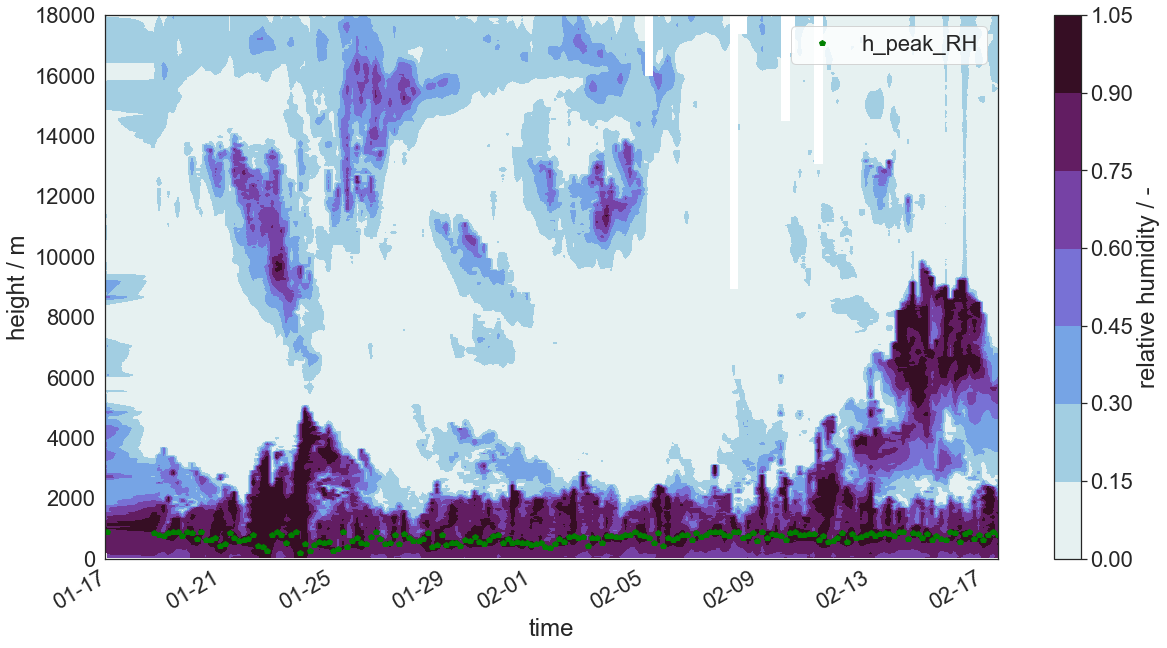

In [1]:
from eurec4a_environment.plot import profile
from eurec4a_environment.variables import boundary_layer
import xarray as xr
import os

# load dataset, i.e. BCO radiosondes
input_dir ='/Users/u237022/ownCloud/WorkEUREC4A/Hackathon/Radiosondes/'
fname = 'level_2/EUREC4A_BCO_Vaisala-RS_L2_v2.2.0.nc'
ds = xr.open_dataset(os.path.join(input_dir,fname))
#import eurec4a_environment.source_data
#ds = eurec4a_environment.source_data.open_radiosondes_dataset()

ds_ascending = ds.where(ds.ascent_flag==True, drop=True)
ds_ascending['h_peak_RH'] = (('sounding'), boundary_layer.mixed_layer_height.calc_peak_RH(ds_ascending, rh='rh'))

### Plot of RH profiles over time from BCO radiosondes with height of maximum RH as scatterpoints
fig =profile.profile_plot_2D(ds_ascending, variable= 'rh',cbar_label='relative humidity / -', cmap='density', levels=10, height_labels = 'h_peak_RH') #freq = 6H
fig


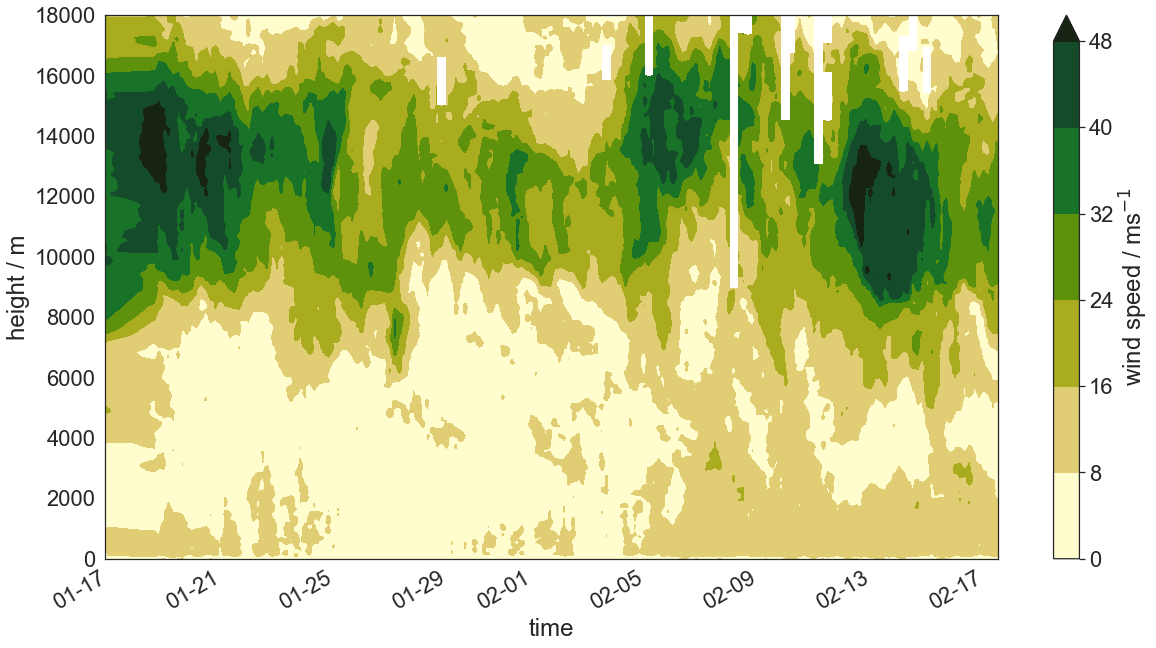

In [2]:
### Plot of wind speed profiles over time from BCO radiosondes

fig = profile.profile_plot_2D(ds_ascending, variable= 'wspd', cbar_label='wind speed / ms$^{-1}$', cmap='speed')
fig

#### Profile 1D Plots

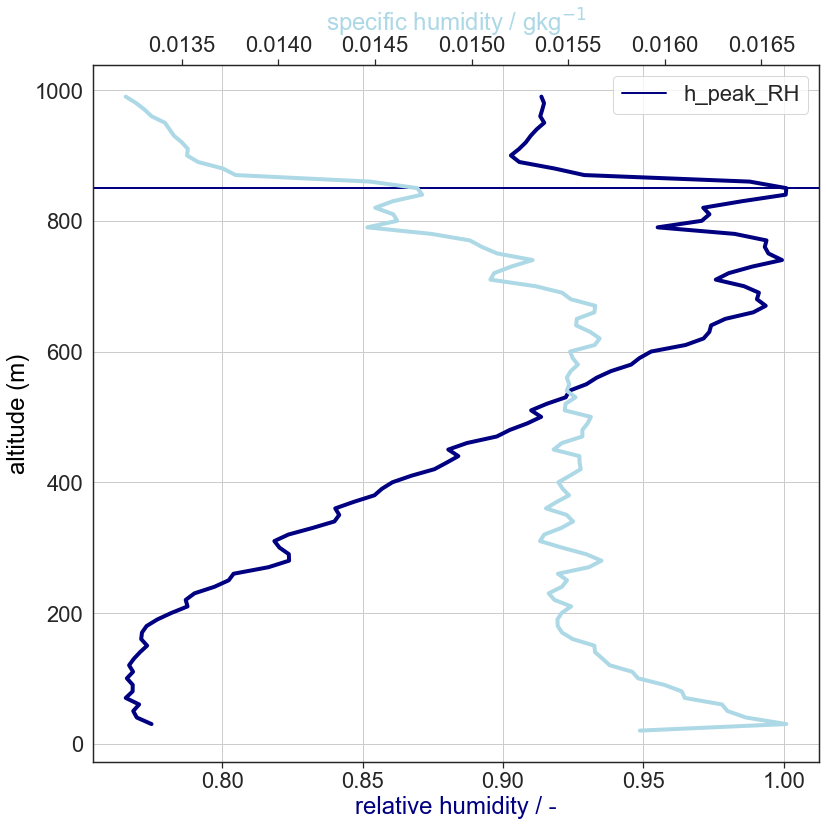

In [3]:
# select one timestep or sounding or calculate a mean profile
ds_plot = ds_ascending.isel({'sounding': 10, 'alt' :slice(0,100)}).interpolate_na(dim= 'alt').squeeze()
fig = profile.plot_profile_1D(ds_plot,variables=["rh", "q"], axis_labels = ['relative humidity / -', 'specific humidity / gkg$^{-1}$'], height_labels='h_peak_RH')
fig